In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from plotting_utils import set_fontsize, render_in_latex, get_project_runs, filter_runs, plot_runs

In [34]:
def get_rank_criteria(r):
    criteria1 = {
    "optimizer": lambda run: run.config["opt"] in ["askotch"],
    "r": lambda run: run.config["precond_params"]["r"] == r,
    }
    criteria2 = {
        "optimizer": lambda run: run.config["opt"] in ["pcg"],
        "precision": lambda run: run.config["precision"] == "float64",
        "r": lambda run: run.config["precond_params"]["r"] == r,
    }
    criteria3 = {
        "optimizer": lambda run: run.config["opt"] in ["pcg"],
        "m": lambda run: run.config["m"] == 20000,
        "precision": lambda run: run.config["precision"] == "float64",
    }

    return criteria1, criteria2, criteria3

In [35]:
def get_b_criteria(b):
    criteria1 = {
        "optimizer": lambda run: run.config["opt"] in ["askotch"],
        "b": lambda run: run.config["b"] == b,
        "r": lambda run: run.config["precond_params"]["r"] <= 500,
    }

    return criteria1

In [36]:
fontsize = 14
entity_name = "sketchy-opts"
project_name1 = "homo_full_krr_v2"
project_name2 = "homo_inducing_krr_v2"

x_axis = "time"
x_axis2 = "datapasses"
save_dir = "./plots/homo"
ylim = [0.02, 0.1]
metric = "smape"

In [37]:
runs_full_krr = get_project_runs(entity_name, project_name1)
runs_inducing_krr = get_project_runs(entity_name, project_name2)

In [38]:
set_fontsize(fontsize)

# Render plots in LaTeX
render_in_latex()

In [39]:
rs = [10, 20, 50, 100, 200, 500]
hparams_to_label = {
    "askotch": ["b"],
    "skotch": ["b"],
    "pcg": ["precond"],
}
color_param = "b"

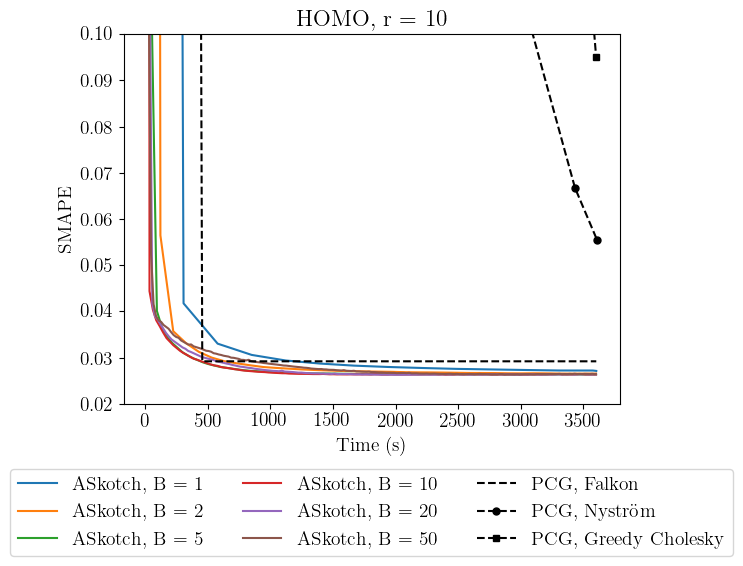

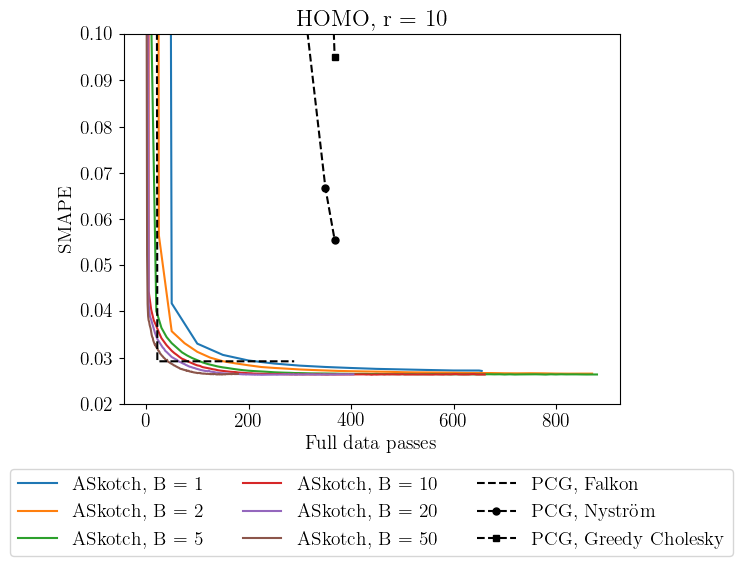

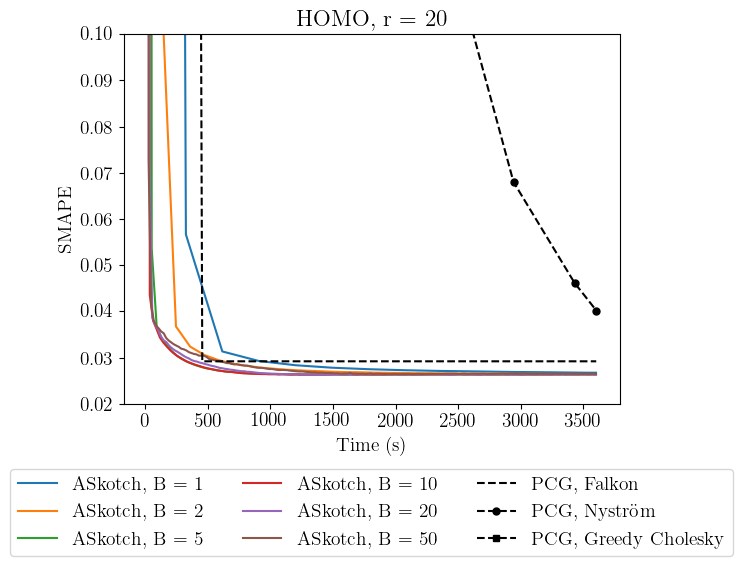

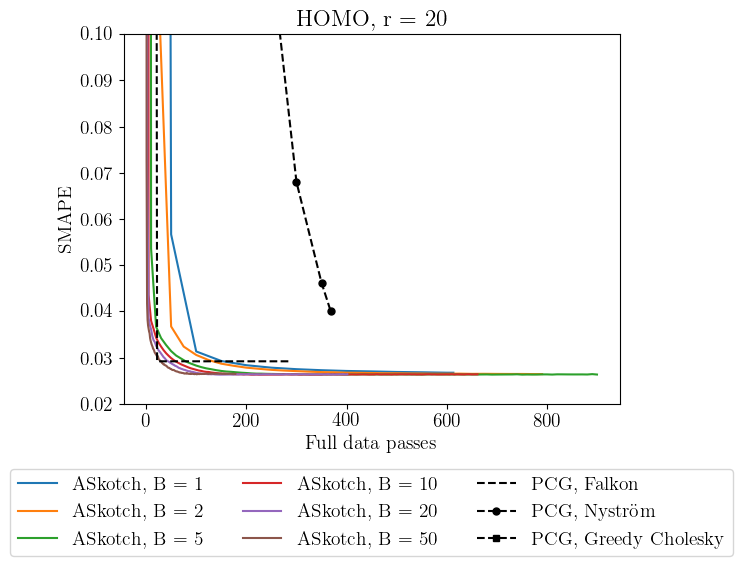

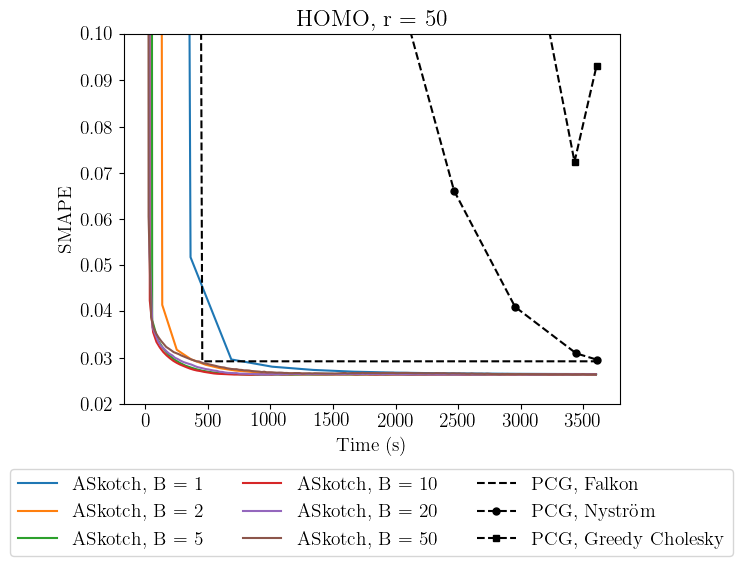

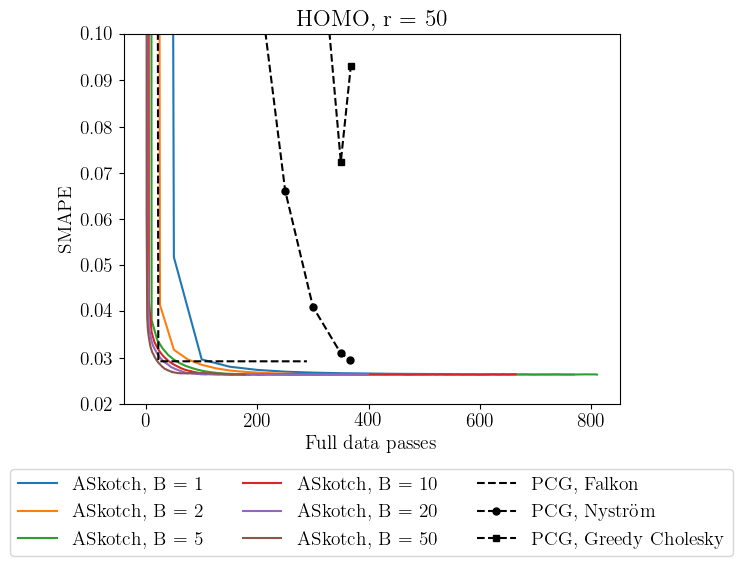

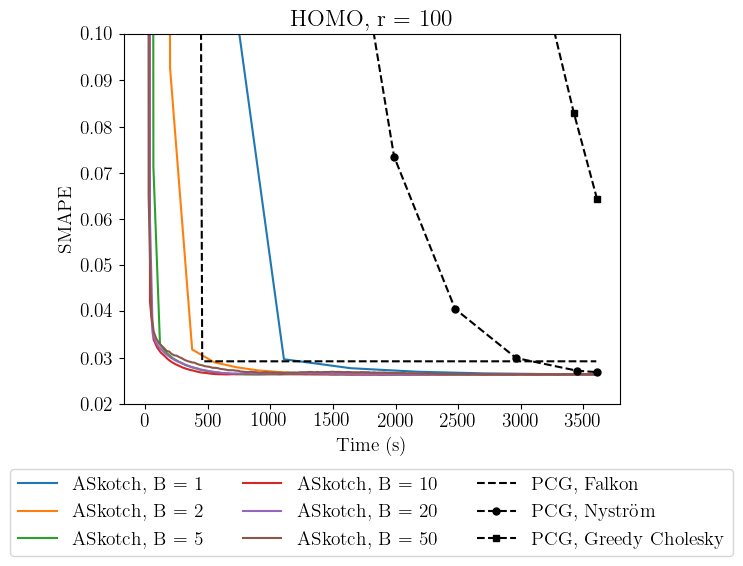

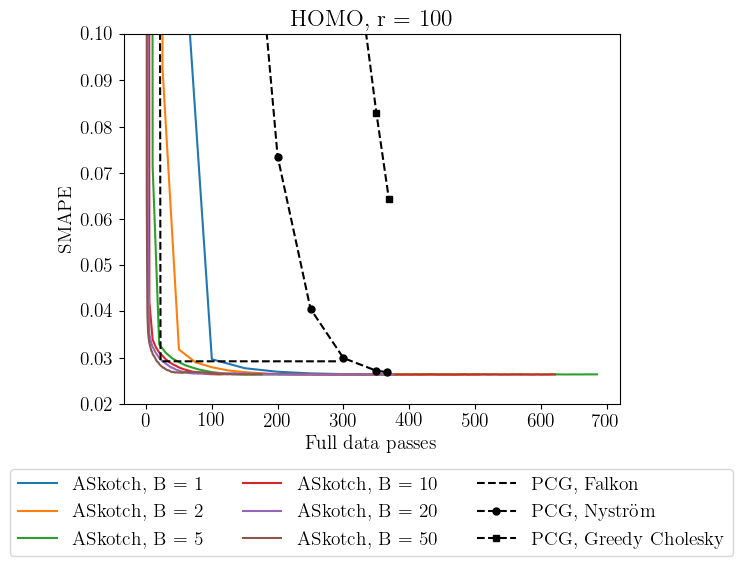

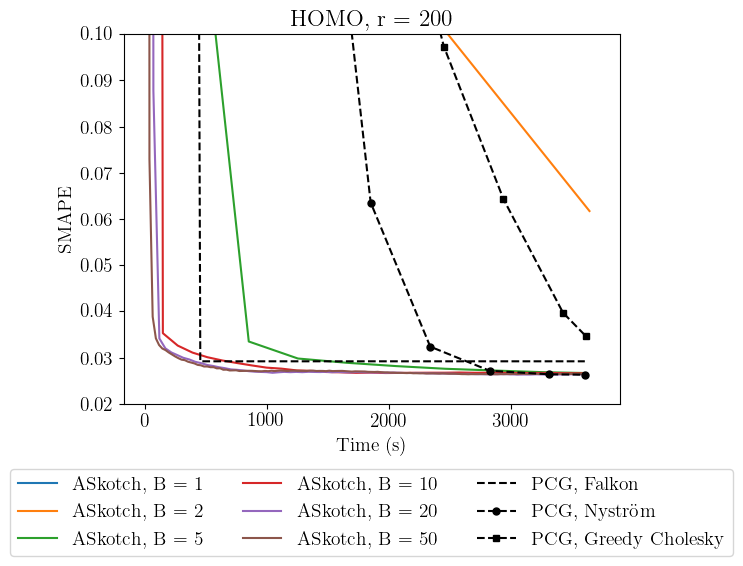

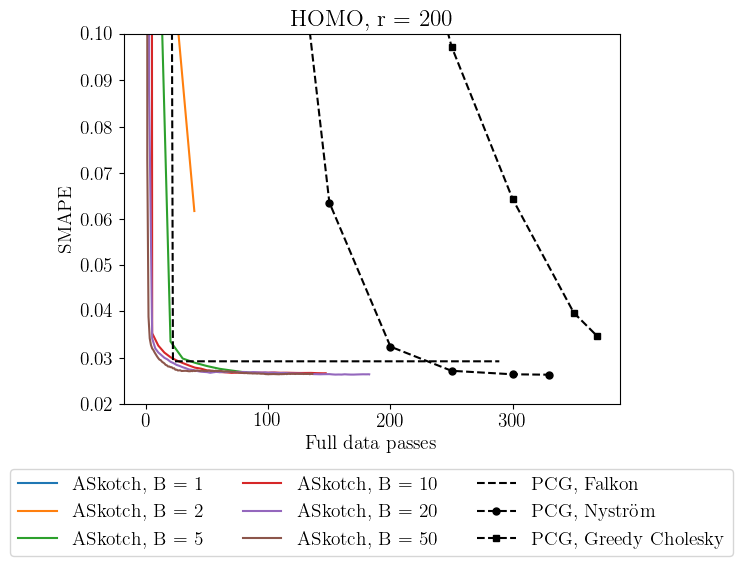

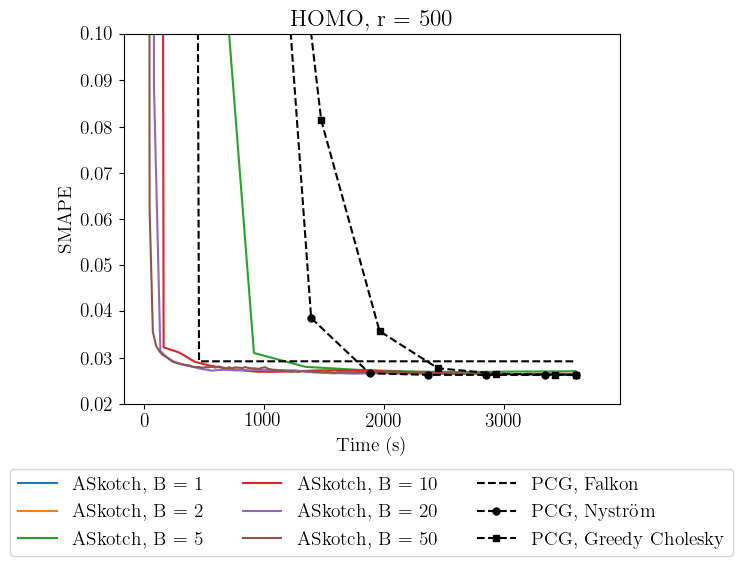

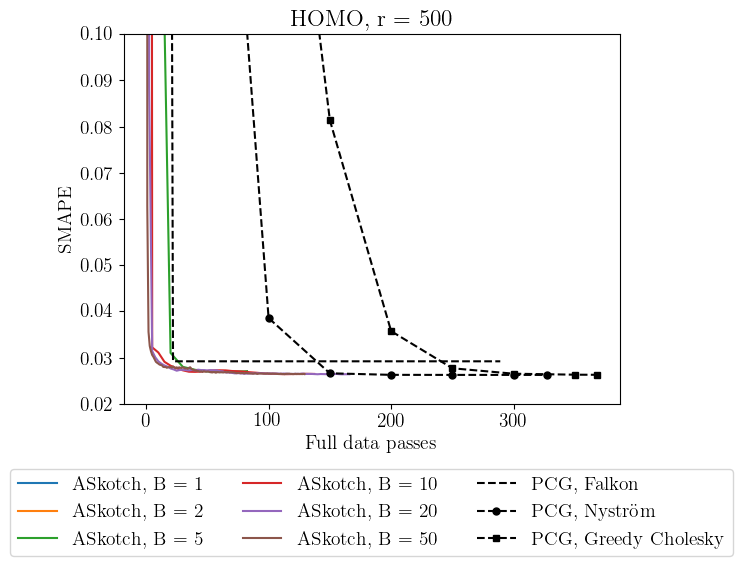

In [40]:
for r in rs:
    criteria1, criteria2, criteria3 = get_rank_criteria(r)

    c_runs1 = filter_runs(runs_full_krr, criteria1)
    c_runs2 = filter_runs(runs_full_krr, criteria2)
    c_runs3 = filter_runs(runs_inducing_krr, criteria3)

    all_runs = c_runs1 + c_runs2 + c_runs3

    plot_runs(all_runs, hparams_to_label, color_param, metric, x_axis, ylim, 
              f"HOMO, r = {r}", save_dir, f"{metric}_vs_{x_axis}_r_{r}.pdf")
    
    plot_runs(all_runs, hparams_to_label, color_param, metric, x_axis2, ylim, 
              f"HOMO, r = {r}", save_dir, f"{metric}_vs_{x_axis2}_r_{r}.pdf")

In [41]:
bs = [1, 2, 5, 10, 20, 50]
hparams_to_label = {
    "askotch": ["r"],
    "skotch": ["r"],
    "pcg": ["precond"],
}
color_param = "r"

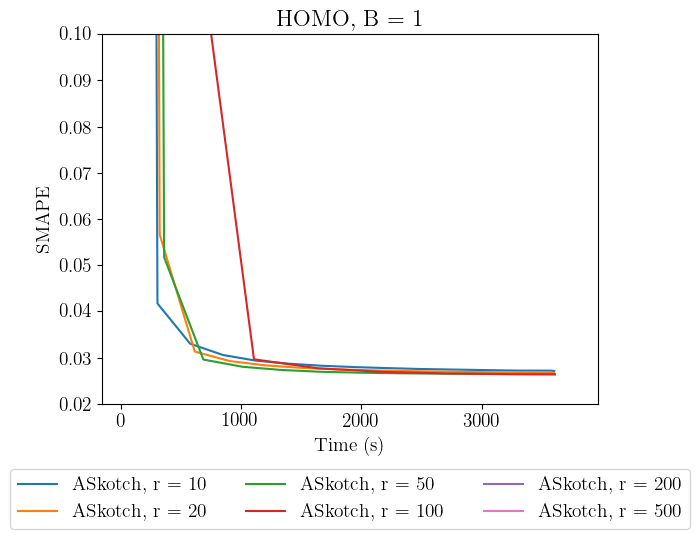

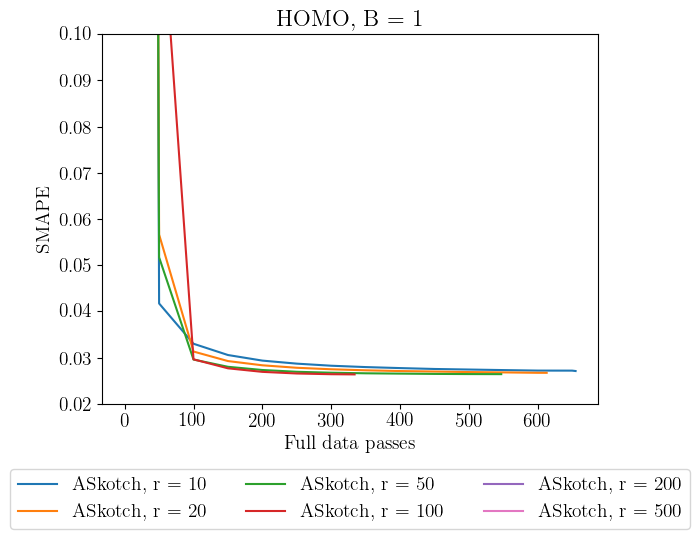

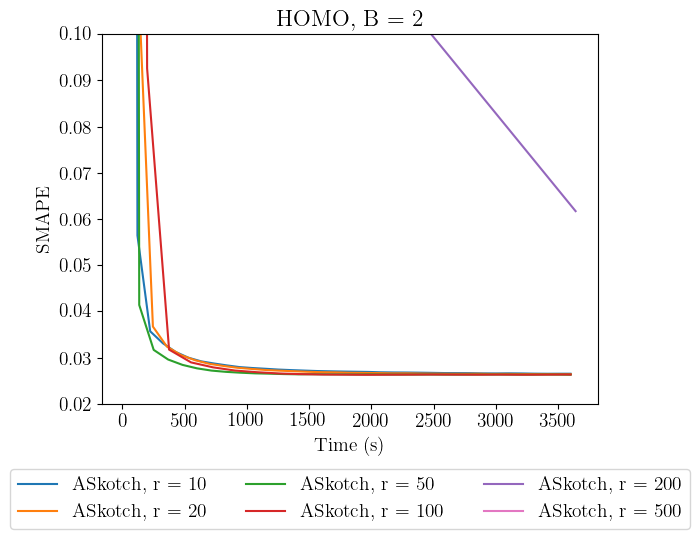

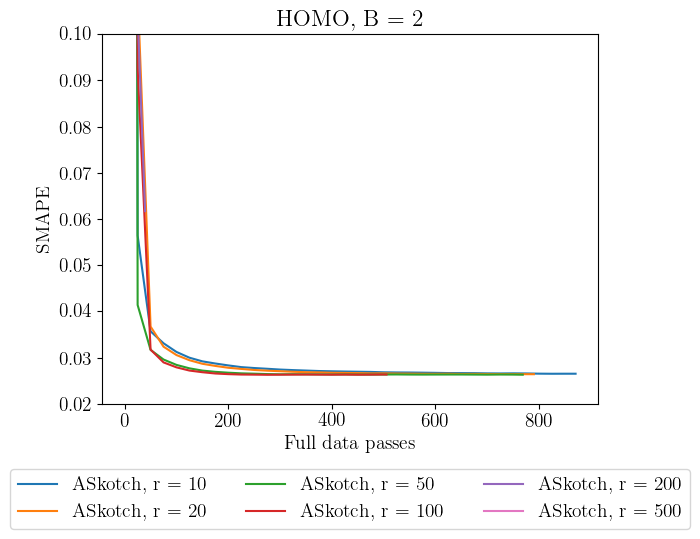

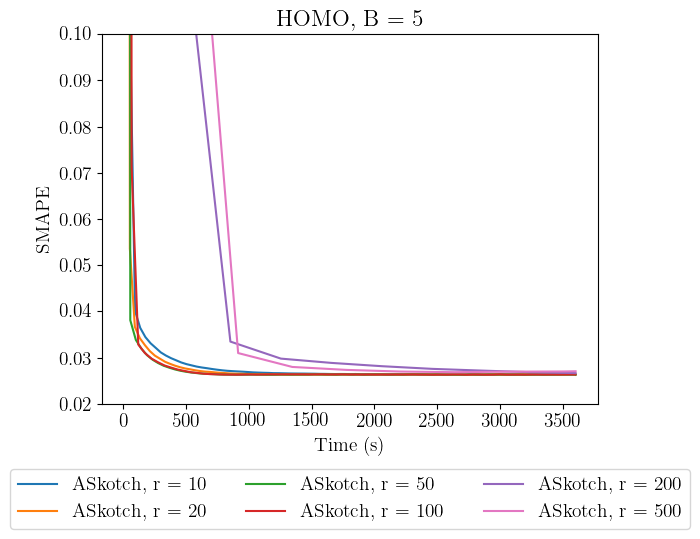

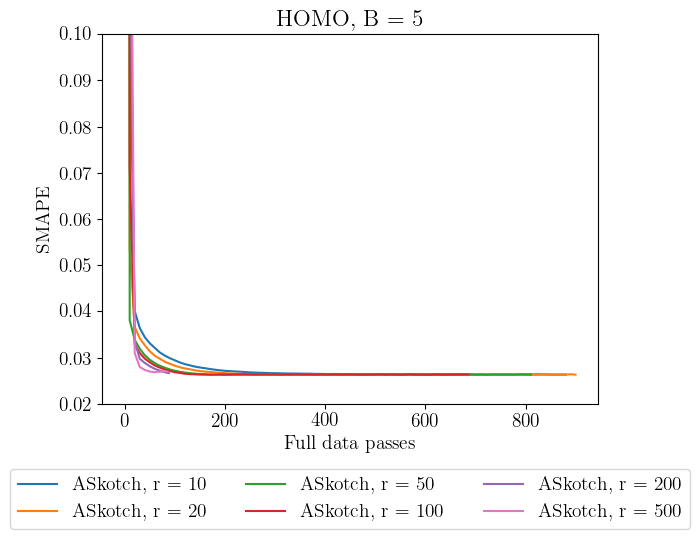

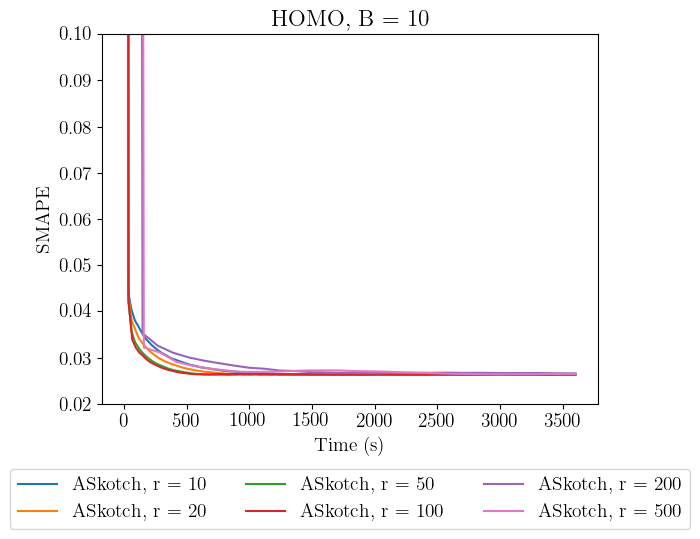

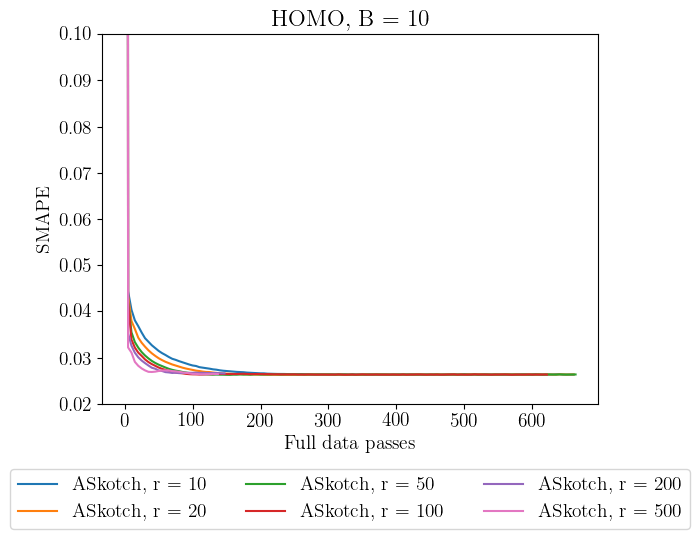

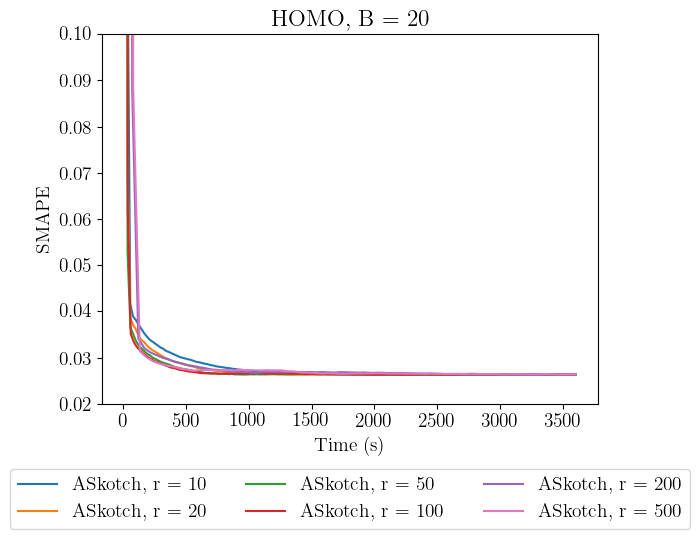

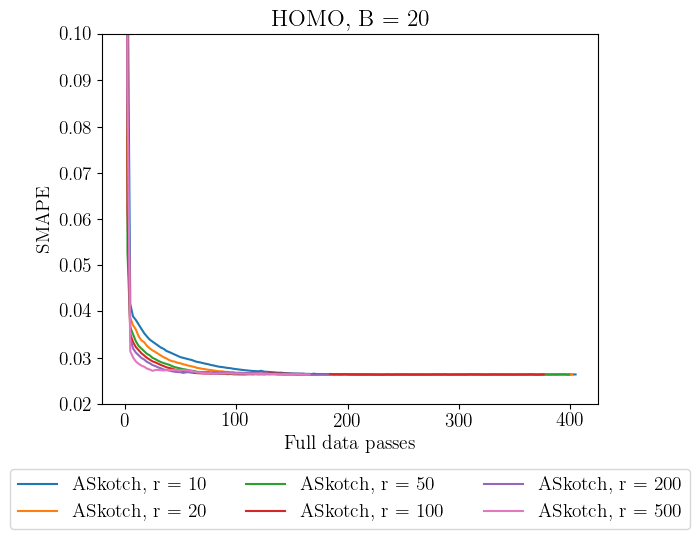

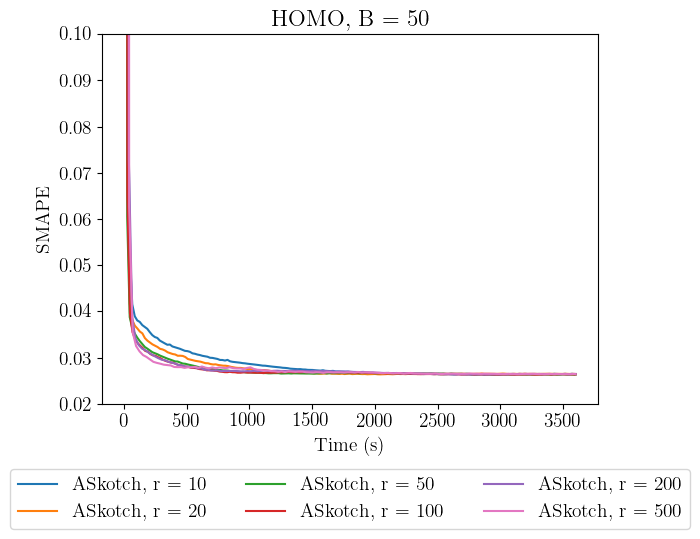

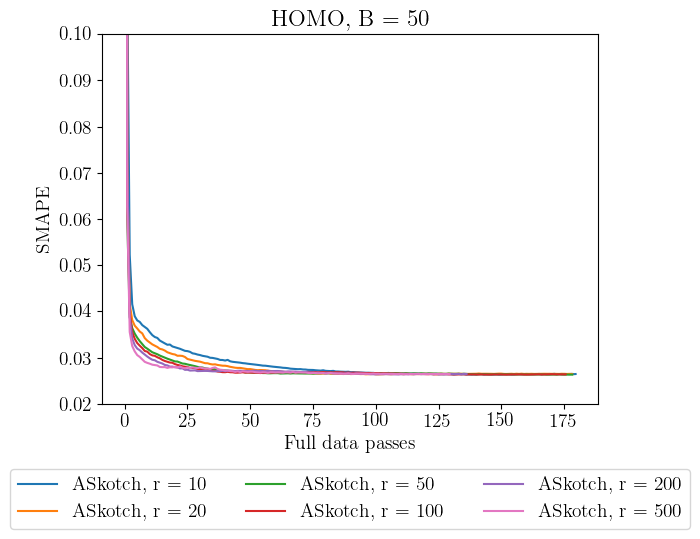

In [42]:
for b in bs:
    criteria1 = get_b_criteria(b)

    c_runs1 = filter_runs(runs_full_krr, criteria1)

    all_runs = c_runs1

    plot_runs(all_runs, hparams_to_label, color_param, metric, x_axis, ylim, 
              f"HOMO, B = {b}", save_dir, f"{metric}_vs_{x_axis}_B_{b}.pdf")
    
    plot_runs(all_runs, hparams_to_label, color_param, metric, x_axis2, ylim, 
            f"HOMO, B = {b}", save_dir, f"{metric}_vs_{x_axis2}_B_{b}.pdf")